In [2]:
import pandas as pd

cars = pd.read_csv(r"Cars93.csv")

Before we run a linear regression, we should check for correlation between variables.

In [3]:
cars[['Weight','MPG.highway']].corr()

,Weight,MPG.highway
Weight,1.000000,-0.810658
MPG.highway,-0.810658,1.000000


We have created a scatter plot to visualize the relationship in the data.

<AxesSubplot:xlabel='Weight', ylabel='MPG.highway'>

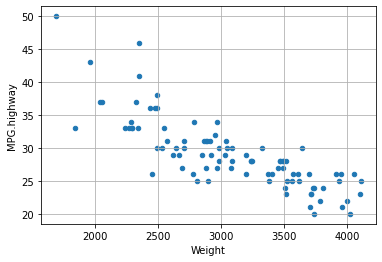

In [4]:
cars.plot.scatter(x='Weight',y='MPG.highway',grid=True)

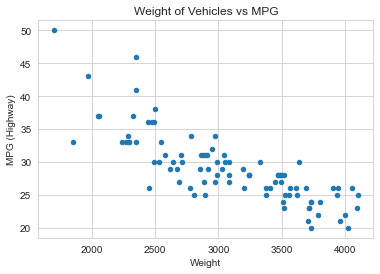

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('whitegrid')

ax = cars.plot(title = 'Weight of Vehicles vs MPG', kind='scatter', x='Weight',y='MPG.highway')
ax.set_xlabel('Weight')
ax.set_ylabel('MPG (Highway)')
plt.show()

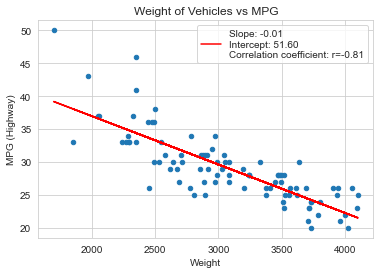

In [6]:
import matplotlib.pyplot as plt
ax = cars.plot(title = 'Weight of Vehicles vs MPG', kind='scatter', x='Weight',y='MPG.highway')
# Set up axis labels
ax.set_xlabel('Weight')
ax.set_ylabel('MPG (Highway)')

x = cars['Weight'].to_numpy()
y = cars['MPG.highway'].to_numpy()

import scipy.stats
slope, intercept, r, p, stderr = scipy.stats.linregress(x,y)
line = f'Slope: {slope:.2f}\nIntercept: {intercept:.2f}\nCorrelation coefficient: r={r:.2f}'
ax.plot(x, intercept + slope * x, label=line, color='red')
ax.legend(facecolor='white')
plt.show()

Multiple Linear Regression

In [7]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93 entries, 0 to 92
Data columns (total 28 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          93 non-null     int64  
 1   Manufacturer        93 non-null     object 
 2   Model               93 non-null     object 
 3   Type                93 non-null     object 
 4   Min.Price           93 non-null     float64
 5   Price               93 non-null     float64
 6   Max.Price           93 non-null     float64
 7   MPG.city            93 non-null     int64  
 8   MPG.highway         93 non-null     int64  
 9   AirBags             93 non-null     object 
 10  DriveTrain          93 non-null     object 
 11  Cylinders           93 non-null     object 
 12  EngineSize          93 non-null     float64
 13  Horsepower          93 non-null     int64  
 14  RPM                 93 non-null     int64  
 15  Rev.per.mile        93 non-null     int64  
 16  Man.trans.

array([[<AxesSubplot:title={'center':'Unnamed: 0'}>,
        <AxesSubplot:title={'center':'Min.Price'}>,
        <AxesSubplot:title={'center':'Price'}>,
        <AxesSubplot:title={'center':'Max.Price'}>],
       [<AxesSubplot:title={'center':'MPG.city'}>,
        <AxesSubplot:title={'center':'MPG.highway'}>,
        <AxesSubplot:title={'center':'EngineSize'}>,
        <AxesSubplot:title={'center':'Horsepower'}>],
       [<AxesSubplot:title={'center':'RPM'}>,
        <AxesSubplot:title={'center':'Rev.per.mile'}>,
        <AxesSubplot:title={'center':'Fuel.tank.capacity'}>,
        <AxesSubplot:title={'center':'Passengers'}>],
       [<AxesSubplot:title={'center':'Length'}>,
        <AxesSubplot:title={'center':'Wheelbase'}>,
        <AxesSubplot:title={'center':'Width'}>,
        <AxesSubplot:title={'center':'Turn.circle'}>],
       [<AxesSubplot:title={'center':'Rear.seat.room'}>,
        <AxesSubplot:title={'center':'Luggage.room'}>,
        <AxesSubplot:title={'center':'Weight'}>, <

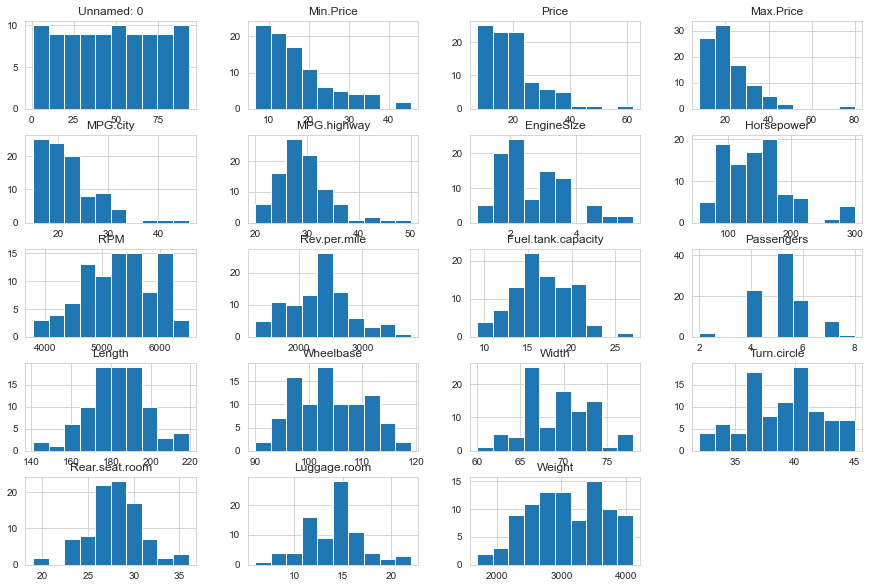

In [8]:
cars.hist(figsize=(15,10))

In [9]:
cars.iloc[:,9:].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93 entries, 0 to 92
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   AirBags             93 non-null     object 
 1   DriveTrain          93 non-null     object 
 2   Cylinders           93 non-null     object 
 3   EngineSize          93 non-null     float64
 4   Horsepower          93 non-null     int64  
 5   RPM                 93 non-null     int64  
 6   Rev.per.mile        93 non-null     int64  
 7   Man.trans.avail     93 non-null     object 
 8   Fuel.tank.capacity  93 non-null     float64
 9   Passengers          93 non-null     int64  
 10  Length              93 non-null     int64  
 11  Wheelbase           93 non-null     int64  
 12  Width               93 non-null     int64  
 13  Turn.circle         93 non-null     int64  
 14  Rear.seat.room      91 non-null     float64
 15  Luggage.room        82 non-null     float64
 16  Weight    

In [10]:
i = cars.index[cars.isna().all(axis=1)]

In [11]:
# delete the non-numerical row in cylinders
cars = cars[cars['Cylinders'] != 'rotary']

In [12]:
# convert cylinders to int
cars['Cylinders'] = cars['Cylinders'].astype(int)

C:\Users\Peter Morris\AppData\Local\Temp\ipykernel_86476\1792949812.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cars['Cylinders'] = cars['Cylinders'].astype(int)


In [13]:
cars.iloc[:,9:]

,AirBags,DriveTrain,Cylinders,EngineSize,Horsepower,RPM,Rev.per.mile,Man.trans.avail,Fuel.tank.capacity,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Make
0,None,Front,4,1.8,140,6300,2890,Yes,13.2,5,177,102,68,37,26.5,11.0,2705,non-USA,Acura Integra
1,Driver & Passenger,Front,6,3.2,200,5500,2335,Yes,18.0,5,195,115,71,38,30.0,15.0,3560,non-USA,Acura Legend
2,Driver only,Front,6,2.8,172,5500,2280,Yes,16.9,5,180,102,67,37,28.0,14.0,3375,non-USA,Audi 90
3,Driver & Passenger,Front,6,2.8,172,5500,2535,Yes,21.1,6,193,106,70,37,31.0,17.0,3405,non-USA,Audi 100
4,Driver only,Rear,4,3.5,208,5700,2545,Yes,21.1,4,186,109,69,39,27.0,13.0,3640,non-USA,BMW 535i
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88,None,Front,5,2.5,109,4500,2915,Yes,21.1,7,187,115,72,38,34.0,NaN,3960,non-USA,Volkswagen Eurovan
89,None,Front,4,2.0,134,5800,2685,Yes,18.5,5,180,103,67,35,31.5,14.0,2985,non-USA,Volkswagen Passat
90,None,Front,6,2.8,178,5800,2385,Yes,18.5,4,159,97,66,36,26.0,15.0,2810,non-USA,Volkswagen Corrado
91,Driver only,Rear,4,2.3,114,5400,2215,Yes,15.8,5,190,104,67,37,29.5,14.0,2985,non-USA,Volvo 240


In [14]:
cars.iloc[:,9:]

,AirBags,DriveTrain,Cylinders,EngineSize,Horsepower,RPM,Rev.per.mile,Man.trans.avail,Fuel.tank.capacity,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Make
0,None,Front,4,1.8,140,6300,2890,Yes,13.2,5,177,102,68,37,26.5,11.0,2705,non-USA,Acura Integra
1,Driver & Passenger,Front,6,3.2,200,5500,2335,Yes,18.0,5,195,115,71,38,30.0,15.0,3560,non-USA,Acura Legend
2,Driver only,Front,6,2.8,172,5500,2280,Yes,16.9,5,180,102,67,37,28.0,14.0,3375,non-USA,Audi 90
3,Driver & Passenger,Front,6,2.8,172,5500,2535,Yes,21.1,6,193,106,70,37,31.0,17.0,3405,non-USA,Audi 100
4,Driver only,Rear,4,3.5,208,5700,2545,Yes,21.1,4,186,109,69,39,27.0,13.0,3640,non-USA,BMW 535i
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88,None,Front,5,2.5,109,4500,2915,Yes,21.1,7,187,115,72,38,34.0,NaN,3960,non-USA,Volkswagen Eurovan
89,None,Front,4,2.0,134,5800,2685,Yes,18.5,5,180,103,67,35,31.5,14.0,2985,non-USA,Volkswagen Passat
90,None,Front,6,2.8,178,5800,2385,Yes,18.5,4,159,97,66,36,26.0,15.0,2810,non-USA,Volkswagen Corrado
91,Driver only,Rear,4,2.3,114,5400,2215,Yes,15.8,5,190,104,67,37,29.5,14.0,2985,non-USA,Volvo 240


In [15]:
cars2 = cars.dropna(axis=1)

In [45]:
cars2 = cars2.drop(['Unnamed: 0'], axis=1)

In [46]:
cars_dum = pd.get_dummies(cars2,columns=['Manufacturer','Model','Type','AirBags','DriveTrain', 'Man.trans.avail','Origin','Make'])
cars_dum.shape

(92, 249)

In [47]:
cars_dum.corr()

,Min.Price,Price,Max.Price,MPG.city,MPG.highway,Cylinders,EngineSize,Horsepower,RPM,Rev.per.mile,...,Make_Toyota Camry,Make_Toyota Celica,Make_Toyota Previa,Make_Toyota Tercel,Make_Volkswagen Corrado,Make_Volkswagen Eurovan,Make_Volkswagen Fox,Make_Volkswagen Passat,Make_Volvo 240,Make_Volvo 850
Min.Price,1.000000,0.970777,0.908287,-0.618067,-0.576874,0.717379,0.689257,0.794630,-0.085479,-0.478305,...,-0.021447,-0.033641,0.023674,-0.111687,0.072452,-0.004374,-0.100712,0.007820,0.059038,0.095622
Price,0.970777,1.000000,0.982133,-0.589267,-0.556696,0.661180,0.629168,0.784143,-0.036347,-0.430480,...,-0.012809,-0.010616,0.036520,-0.104889,0.043097,0.003634,-0.112562,0.006923,0.036520,0.080368
Max.Price,0.908287,0.982133,1.000000,-0.543205,-0.518775,0.590609,0.557088,0.744381,0.003536,-0.375783,...,-0.005576,0.007797,0.046006,-0.095366,0.018305,0.008753,-0.117336,0.005887,0.016394,0.064155
MPG.city,-0.618067,-0.589267,-0.543205,1.000000,0.943668,-0.687222,-0.734536,-0.670457,0.395603,0.699216,...,-0.007947,0.048295,-0.082937,0.179528,-0.082937,-0.101685,0.048295,-0.026695,-0.026695,-0.045442
MPG.highway,-0.576874,-0.556696,-0.518775,0.943668,1.000000,-0.636174,-0.646166,-0.618626,0.339630,0.589280,...,-0.002573,0.056602,-0.140648,0.155227,-0.081473,-0.160373,0.076327,0.017152,-0.022298,-0.022298
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Make_Volkswagen Eurovan,-0.004374,0.003634,0.008753,-0.101685,-0.160373,0.002634,-0.018632,-0.069020,-0.138011,0.123031,...,-0.010989,-0.010989,-0.010989,-0.010989,-0.010989,1.000000,-0.010989,-0.010989,-0.010989,-0.010989
Make_Volkswagen Fox,-0.100712,-0.112562,-0.117336,0.048295,0.076327,-0.078153,-0.090054,-0.126504,0.041834,0.045967,...,-0.010989,-0.010989,-0.010989,-0.010989,-0.010989,-0.010989,1.000000,-0.010989,-0.010989,-0.010989
Make_Volkswagen Passat,0.007820,0.006923,0.005887,-0.026695,0.017152,-0.078153,-0.069648,-0.017696,0.095787,0.074470,...,-0.010989,-0.010989,-0.010989,-0.010989,-0.010989,-0.010989,-0.010989,1.000000,-0.010989,-0.010989
Make_Volvo 240,0.059038,0.036520,0.016394,-0.026695,-0.022298,-0.078153,-0.039038,-0.058756,0.023849,-0.024762,...,-0.010989,-0.010989,-0.010989,-0.010989,-0.010989,-0.010989,-0.010989,-0.010989,1.000000,-0.010989


In [42]:
make_cols = [col for col in cars_dum.columns if 'Make' in col]
print(make_cols)

['Make_Acura Integra', 'Make_Acura Legend', 'Make_Audi 100', 'Make_Audi 90', 'Make_BMW 535i', 'Make_Buick Century', 'Make_Buick LeSabre', 'Make_Buick Riviera', 'Make_Buick Roadmaster', 'Make_Cadillac DeVille', 'Make_Cadillac Seville', 'Make_Chevrolet Astro', 'Make_Chevrolet Camaro', 'Make_Chevrolet Caprice', 'Make_Chevrolet Cavalier', 'Make_Chevrolet Corsica', 'Make_Chevrolet Corvette', 'Make_Chevrolet Lumina', 'Make_Chevrolet Lumina_APV', 'Make_Chrylser Concorde', 'Make_Chrysler Imperial', 'Make_Chrysler LeBaron', 'Make_Dodge Caravan', 'Make_Dodge Colt', 'Make_Dodge Dynasty', 'Make_Dodge Shadow', 'Make_Dodge Spirit', 'Make_Dodge Stealth', 'Make_Eagle Summit', 'Make_Eagle Vision', 'Make_Ford Aerostar', 'Make_Ford Crown_Victoria', 'Make_Ford Escort', 'Make_Ford Festiva', 'Make_Ford Mustang', 'Make_Ford Probe', 'Make_Ford Taurus', 'Make_Ford Tempo', 'Make_Geo Metro', 'Make_Geo Storm', 'Make_Honda Accord', 'Make_Honda Civic', 'Make_Honda Prelude', 'Make_Hyundai Elantra', 'Make_Hyundai Exc

In [61]:
x = cars_dum.drop("MPG.highway",axis=1).copy()
x

,Min.Price,Price,Max.Price,MPG.city,Cylinders,EngineSize,Horsepower,RPM,Rev.per.mile,Fuel.tank.capacity,...,Make_Toyota Camry,Make_Toyota Celica,Make_Toyota Previa,Make_Toyota Tercel,Make_Volkswagen Corrado,Make_Volkswagen Eurovan,Make_Volkswagen Fox,Make_Volkswagen Passat,Make_Volvo 240,Make_Volvo 850
0,12.9,15.9,18.8,25,4,1.8,140,6300,2890,13.2,...,0,0,0,0,0,0,0,0,0,0
1,29.2,33.9,38.7,18,6,3.2,200,5500,2335,18.0,...,0,0,0,0,0,0,0,0,0,0
2,25.9,29.1,32.3,20,6,2.8,172,5500,2280,16.9,...,0,0,0,0,0,0,0,0,0,0
3,30.8,37.7,44.6,19,6,2.8,172,5500,2535,21.1,...,0,0,0,0,0,0,0,0,0,0
4,23.7,30.0,36.2,22,4,3.5,208,5700,2545,21.1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88,16.6,19.7,22.7,17,5,2.5,109,4500,2915,21.1,...,0,0,0,0,0,1,0,0,0,0
89,17.6,20.0,22.4,21,4,2.0,134,5800,2685,18.5,...,0,0,0,0,0,0,0,1,0,0
90,22.9,23.3,23.7,18,6,2.8,178,5800,2385,18.5,...,0,0,0,0,1,0,0,0,0,0
91,21.8,22.7,23.5,21,4,2.3,114,5400,2215,15.8,...,0,0,0,0,0,0,0,0,1,0


In [62]:
y = cars2['MPG.highway'].copy()
y

0     31
1     25
2     26
3     26
4     30
      ..
88    21
89    30
90    25
91    28
92    28
Name: MPG.highway, Length: 92, dtype: int64

In [63]:
import numpy as np
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)

In [64]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train, y_train)
# y_pred = LinearRegression().predict(X_test)
pred = reg.predict(X_test)

In [65]:
print(x.shape, y.shape, X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(92, 248) (92,) (69, 248) (69,) (23, 248) (23,)


Text(0, 0.5, 'actual mpg hwy')

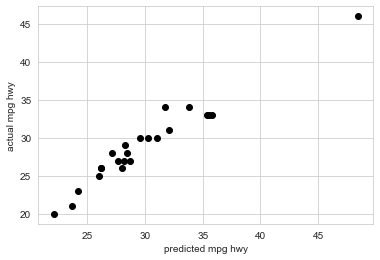

In [67]:
plt.scatter(x=pred, y=y_test, color = 'k')
plt.xlabel('predicted mpg hwy')
plt.ylabel('actual mpg hwy')

Text(0, 0.5, 'residuals')

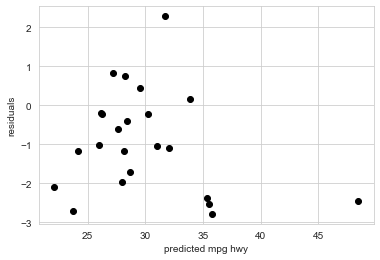

In [68]:
resid = y_test - pred
plt.scatter(x=pred, y=resid, color='k')
plt.xlabel('predicted mpg hwy')
plt.ylabel('residuals')

In [60]:
reg.score(X_test, y_test)

0.9084851888956287

In [76]:
c = reg.coef_
intercept = reg.intercept_
print(f'{intercept} Intercept')
for i in range(len(x)):
    print(c[i], x.columns[i])

-9.030363481134348 Intercept
-0.054017625114823484 Min.Price
0.01753421255509333 Price
0.020283588304390962 Max.Price
0.8725656317845993 MPG.city
-0.28588854847633205 Cylinders
0.0709199198075644 EngineSize
0.0006448847460397977 Horsepower
-0.00029520950022998704 RPM
-0.0004920299451859345 Rev.per.mile
0.04927177256554561 Fuel.tank.capacity
-0.8080572960349443 Passengers
0.05917799741562446 Length
0.0971904065609202 Wheelbase
0.2331666886390586 Width
-0.10669489231242157 Turn.circle
-0.002349894486071258 Weight
-0.5705691055271902 Manufacturer_Acura
0.07605885139373558 Manufacturer_Audi
0.4766080575049111 Manufacturer_BMW
0.6407562536764136 Manufacturer_Buick
0.4575739436811393 Manufacturer_Cadillac
0.5240539884607137 Manufacturer_Chevrolet
-0.2058789648817578 Manufacturer_Chrylser
-0.5736398280097508 Manufacturer_Chrysler
-0.29763884622530795 Manufacturer_Dodge
-0.8867101164697858 Manufacturer_Eagle
-0.6002918500246814 Manufacturer_Ford
0.17749686702844197 Manufacturer_Geo
0.047371537